# Module 4 R Exercise

In these exercises, we will use ggplot2 and plotly functions to plot some statistical plots about a data set. 

**Have your ggplot2 and plotly cheatsheets and documentation handy to find the right parameters for the functions.** 

Let's read the Gapminder data from the web resource.

In [1]:
library(ggplot2)
library(plotly)
library(RColorBrewer)

data <- read.csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
head(data)


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



country     year pop      continent lifeExp gdpPercap
1 Afghanistan 1952  8425333 Asia      28.801  779.4453 
2 Afghanistan 1957  9240934 Asia      30.332  820.8530 
3 Afghanistan 1962 10267083 Asia      31.997  853.1007 
4 Afghanistan 1967 11537966 Asia      34.020  836.1971 
5 Afghanistan 1972 13079460 Asia      36.088  739.9811 
6 Afghanistan 1977 14880372 Asia      38.438  786.1134

**Exercise 1:** Use which() function to get a subset of the data between years 1951 and 1993. 

In [2]:
data_sub <- data[which(data$year < 1994, data$year > 1950), ]

**Exercise 2:** Plot **small multiples of histograms** of **life expectancy for each year** for the subset. Use a binwidth of **5**, and use sensible axis labels.

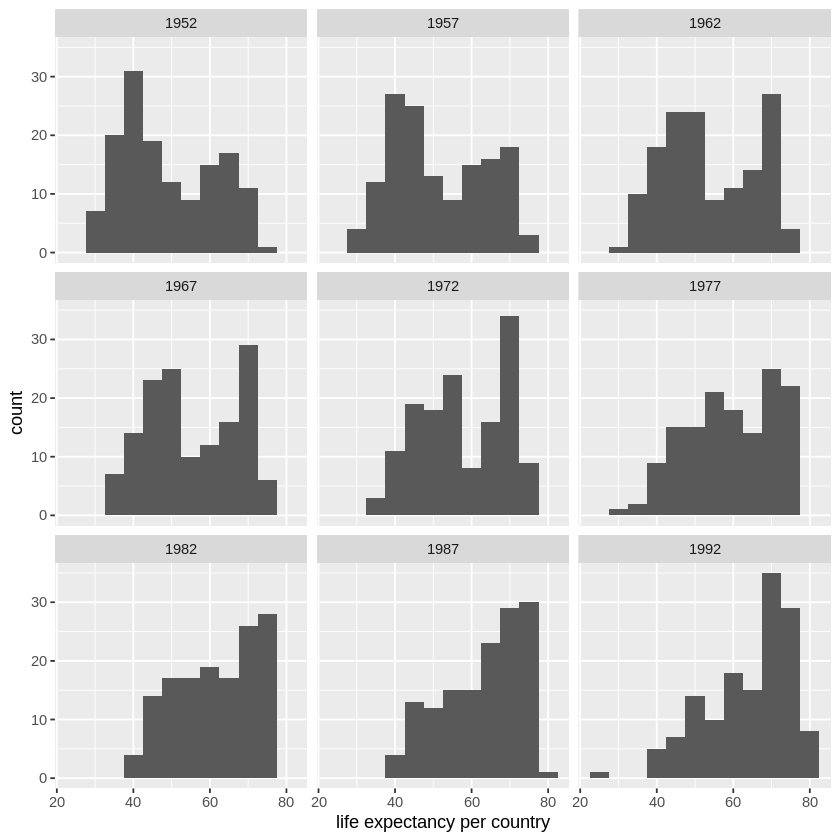

In [3]:
ggplot(data_sub, aes(x = lifeExp)) + 
 geom_histogram(binwidth = 5) +
  facet_wrap(~ year) +
    labs(x = "life expectancy per country")

**Exercise 3:** Do the same as above, but plot a density function this time. How do you interpret the change of density in years?

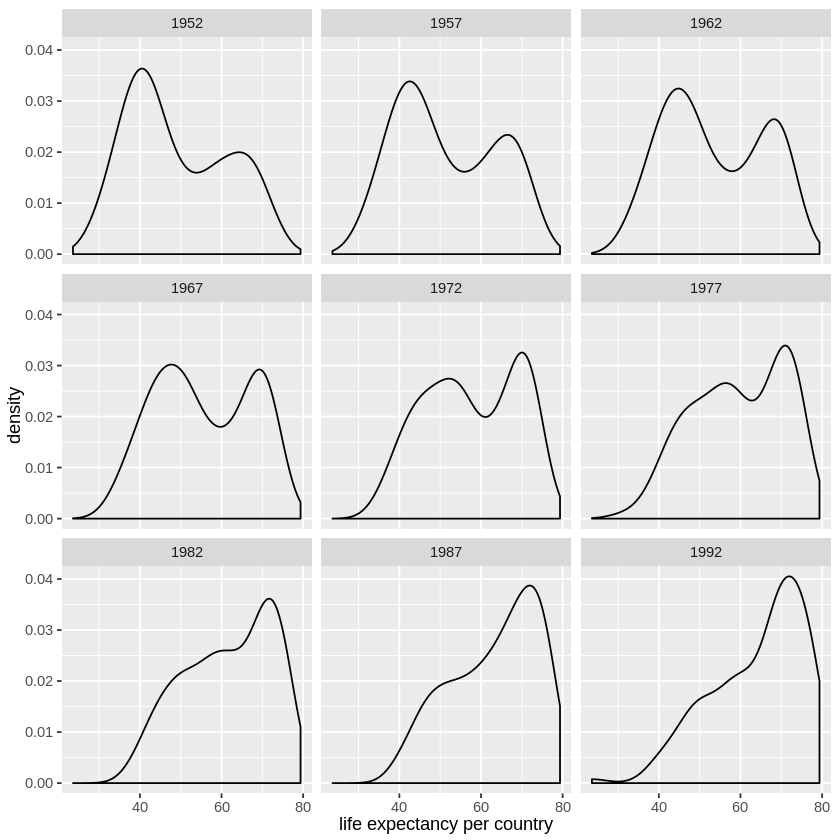

In [4]:
ggplot(data_sub, aes(x = lifeExp)) + 
 geom_density() +
  facet_wrap(~ year) +
    labs(x = "life expectancy per country")

# I think this plot makes it easier to see that over time, we see fewer countries with very low life expectancies.

**Exercise 4:** Create a line plot (use both geom_line and geom_point) to plot year versus population for the **whole** data set. Use a logarithmic scale in **y axis** and **group by country**, **color by continent**. Can you see any pattern? 

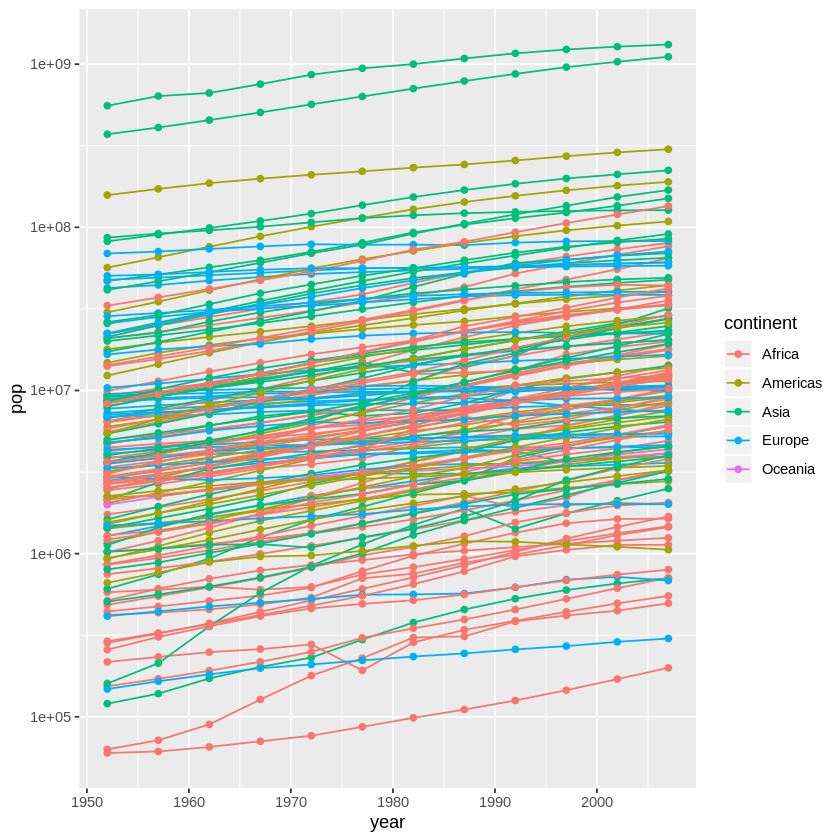

In [5]:
ggplot(data, aes(x = year, y = pop, group = country, color = continent)) +
       geom_line() + geom_point() + scale_y_log10()

# For most countries, we do see a consistent increase in population over time, though it is a bit harder to see with the
# countries around the middle of the spectrum. It seems that Asian countries both have higher population and a slightly higher
# rate of increase

**Aggregate data:** The above plot is too crowded to see anything. Let's aggregate data by continent and year so that we can have meaningful data to plot. The following code creates a new data frame by computing the sums of population for years and continents.

In [6]:
aggdata <- aggregate(data$pop, by=list(continent=data$continent, year=data$year), FUN=sum, na.rm=TRUE)

head(aggdata)

continent year x         
1 Africa    1952  237640501
2 Americas  1952  345152446
3 Asia      1952 1395357352
4 Europe    1952  418120846
5 Oceania   1952   10686006
6 Africa    1957  264837738

**Exercise 5:** Now **repeat exercise 4 with this aggregate data** and group and color by continent. Do you see a pattern ?? 

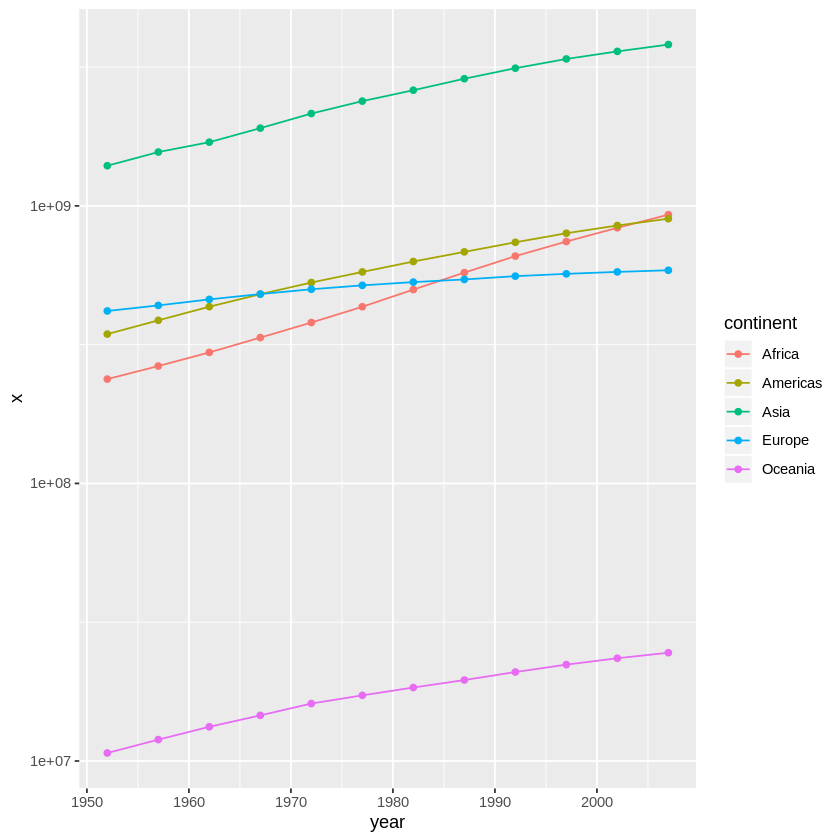

In [7]:
ggplot(aggdata, aes(x = year, y = x, group = continent, color = continent)) +
       geom_line() + geom_point() + scale_y_log10()

**Exercise 6:** Now, plot a **stacked area chart** to see the same. Instead of group and color, use only **fill** parameter for **continent**, and use **geom_area**.

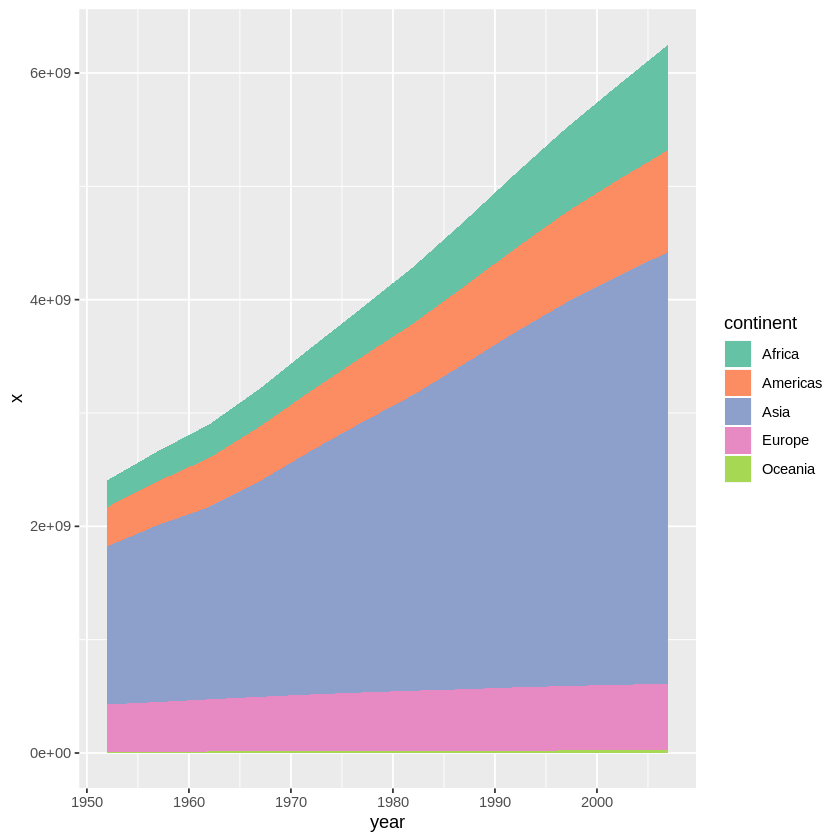

In [8]:
ggplot(aggdata, aes(x = year, y = x, fill = continent)) + geom_area() + scale_fill_brewer(palette="Set2")


**Find percentages:** The above plot shows actual population numbers and they grow in time. We want to see the percentage change of the continents' populations w.r.t total world population. The code below computes that. 

In [9]:
my_fun=function(vec){ as.numeric(vec[3]) / sum(aggdata$x[aggdata$year==vec[2]]) *100 }
aggdata$perc=apply(aggdata , 1 , my_fun)

head(aggdata)

continent year x          perc      
1 Africa    1952  237640501  9.8730674
2 Americas  1952  345152446 14.3397836
3 Asia      1952 1395357352 57.9718401
4 Europe    1952  418120846 17.3713456
5 Oceania   1952   10686006  0.4439633
6 Africa    1957  264837738  9.9398470

**Exercise 7:** Now, **plot the same as exercise 6** but use **perc** as the y axis. 

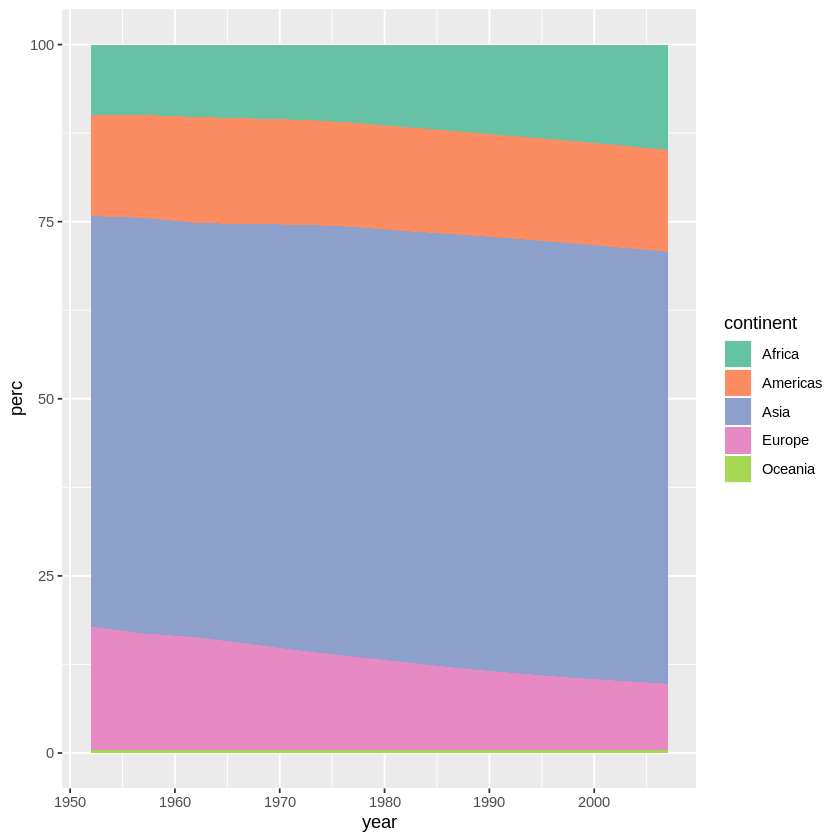

In [10]:
ggplot(aggdata, aes(x = year, y = perc, fill = continent)) + 
    geom_area() + scale_fill_brewer(palette="Set2")

**Exercise 8:** We will aggregate once more; this time we will compute the **mean gdp per capita for continents and years**. **It's your turn this time.**

In [11]:
aggdata2 <- aggregate(data$gdpPercap, by=list(continent=data$continent, year=data$year), FUN=mean, na.rm=TRUE)
head(aggdata2)

continent year x        
1 Africa    1952  1252.572
2 Americas  1952  4079.063
3 Asia      1952  5195.484
4 Europe    1952  5661.057
5 Oceania   1952 10298.086
6 Africa    1957  1385.236

**Exercise 9:** Plot a **heatmap** using **plot_ly function** for **years** vs. **continents** using the **mean gdp per capita as the z value**. 

In [12]:
plot_ly(aggdata2, x = ~year, y = ~continent, z = ~x, type="heatmap", colors=colorRamp(c("white", "blue")))
        


HTML widgets cannot be represented in plain text (need html)

**Exercise 10:** Plot a **boxplot** for **gdp per capita** using **plot_ly function** for **continents**. 

Use the **whole** data set, **color by continent**, and make sure **y axis is in log scale**. 

**When hovering over data, what do you notice about first and third quartiles for each continent (hint: think of income inequality) ?** 

In [13]:
plot_ly(data, x = ~gdpPercap, color = ~continent, type="box") %>% layout(yaxis = list(type = "log"))

# It appears that Europe has the largest interquartile range. Therefore it has the greatest disparity between countries in
# terms of GDP per capita. Africa appears to have the smallest interquartile range, therefore it has the greatest level of
# homogoneity across the continent in terms of GDP per capita.

HTML widgets cannot be represented in plain text (need html)